# LendingClub Loan Data

#### Name: NIKHIL JAIN

In [1]:
import numpy as np
import pandas as pd

In [2]:
lc = pd.read_csv('accepted_2007_to_2018q4.csv', delimiter = ',')
lc.head()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
missing_values = lc.isnull().sum()
missing_values [0:50]

id                               0
member_id                  2260701
loan_amnt                       33
funded_amnt                     33
funded_amnt_inv                 33
term                            33
int_rate                        33
installment                     33
grade                           33
sub_grade                       33
emp_title                   167002
emp_length                  146940
home_ownership                  33
annual_inc                      37
verification_status             33
issue_d                         33
loan_status                     33
pymnt_plan                      33
url                             33
desc                       2134634
purpose                         33
title                        23358
zip_code                        34
addr_state                      33
dti                           1744
delinq_2yrs                     62
earliest_cr_line                62
fico_range_low                  33
fico_range_high     

### Lets calculate what % of total values are missing 

In [4]:
total_cells = np.product(lc.shape)
total_missing = missing_values.sum()

percent = (total_cells/total_missing)*100
print(percent)

314.66278366763333


In [5]:
lc.shape

(2260701, 151)

In [6]:
missing_values = lc.isnull().sum()
missing_values [49:105]

next_pymnt_d                      1345343
last_credit_pull_d                    105
last_fico_range_high                   33
last_fico_range_low                    33
collections_12_mths_ex_med            178
mths_since_last_major_derog       1679926
policy_code                            33
application_type                       33
annual_inc_joint                  2139991
dti_joint                         2139995
verification_status_joint         2144971
acc_now_delinq                         62
tot_coll_amt                        70309
tot_cur_bal                         70309
open_acc_6m                        866163
open_act_il                        866162
open_il_12m                        866162
open_il_24m                        866162
mths_since_rcnt_il                 909957
total_bal_il                       866162
il_util                           1068883
open_rv_12m                        866162
open_rv_24m                        866162
max_bal_bc                        

In [7]:
index_no = lc.columns.get_loc('num_op_rev_tl')
index_no

99

## Deleted column from 53 to 99

In [8]:
lc.drop(lc.iloc[:, 53:100], inplace = True, axis = 1)

In [9]:
lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Drpping 33 rows with null values

In [10]:
mod_df = lc.dropna( how='all', subset=['sub_grade', 'funded_amnt' , 'last_fico_range_high'], inplace= True)

In [11]:
lc.shape

(2260668, 104)

### Deleting specific columns

In [12]:
del1 = lc.drop('member_id', axis = 1, inplace= True)
lc.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
del2 = lc.drop('url', axis = 1, inplace= True)

In [14]:
del4 = lc.drop('emp_title', axis = 1, inplace= True)

In [15]:
del5 = lc.drop('next_pymnt_d', axis = 1, inplace= True)

In [16]:
del6 = lc.drop('pymnt_plan', axis = 1, inplace= True)

In [17]:
lc.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
missing_values = lc.isnull().sum()
missing_values [49:105]

num_rev_tl_bal_gt_0                             70276
num_sats                                        58590
num_tl_120dpd_2m                               153657
num_tl_30dpd                                    70276
num_tl_90g_dpd_24m                              70276
num_tl_op_past_12m                              70276
pct_tl_nvr_dlq                                  70431
percent_bc_gt_75                                75379
pub_rec_bankruptcies                             1365
tax_liens                                         105
tot_hi_cred_lim                                 70276
total_bal_ex_mort                               50030
total_bc_limit                                  50030
total_il_high_credit_limit                      70276
revol_bal_joint                               2152648
sec_app_fico_range_low                        2152647
sec_app_fico_range_high                       2152647
sec_app_earliest_cr_line                      2152647
sec_app_inq_last_6mths      

In [19]:
index_no = lc.columns.get_loc('num_rev_accts')
index_no

48

### Deleted column from 50 to 105

In [20]:
lc.drop(lc.iloc[:, 50:105], inplace = True, axis = 1)
lc.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,num_rev_accts,num_rev_tl_bal_gt_0
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,...,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,9.0,4.0
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,...,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,27.0,5.0
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,...,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,7.0,3.0
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,...,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,13.0,5.0
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,...,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,19.0,6.0


In [21]:
missing_values = lc.isnull().sum()
missing_values [:]

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                  146907
home_ownership                   0
annual_inc                       4
verification_status              0
issue_d                          0
loan_status                      0
desc                       2134601
purpose                          0
title                        23325
zip_code                         1
addr_state                       0
dti                           1711
delinq_2yrs                     29
earliest_cr_line                29
fico_range_low                   0
fico_range_high                  0
inq_last_6mths                  30
mths_since_last_delinq     1158502
mths_since_last_record     1901512
open_acc            

### Filling mths_since_last_delinq & other columns Na values with 0

In [22]:
fill_1 = lc.mths_since_last_delinq.fillna(0 , inplace= True)

In [23]:
fill_2 = lc.mths_since_last_record.fillna(0 , inplace= True)

In [24]:
missing_values = lc.isnull().sum()
missing_values [:]

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                  146907
home_ownership                   0
annual_inc                       4
verification_status              0
issue_d                          0
loan_status                      0
desc                       2134601
purpose                          0
title                        23325
zip_code                         1
addr_state                       0
dti                           1711
delinq_2yrs                     29
earliest_cr_line                29
fico_range_low                   0
fico_range_high                  0
inq_last_6mths                  30
mths_since_last_delinq           0
mths_since_last_record           0
open_acc            

### Last payment date blanks are one from whom all amount has been recovered - make them as NA for all the null values

In [25]:
fill_3 = lc.last_pymnt_d.fillna('NA', inplace= True)

In [26]:
lc_final = lc

In [27]:
missing_values = lc_final.isnull().sum()
missing_values [:]

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                  146907
home_ownership                   0
annual_inc                       4
verification_status              0
issue_d                          0
loan_status                      0
desc                       2134601
purpose                          0
title                        23325
zip_code                         1
addr_state                       0
dti                           1711
delinq_2yrs                     29
earliest_cr_line                29
fico_range_low                   0
fico_range_high                  0
inq_last_6mths                  30
mths_since_last_delinq           0
mths_since_last_record           0
open_acc            

In [28]:
miss_val = (((lc_final.isnull().sum()).sum())/lc_final.size)*100
miss_val

2.166749827926967

In [29]:
lc_final.shape

(2260668, 50)

In [30]:
# Remove string characters in 'term' column
lc['term'] = lc['term'].map(lambda x: x.lstrip(' ').rstrip('months'))

In [31]:
# Remove string characters in 'zipcode' column
lc['zip_code'] = lc['zip_code'].str.replace(r'\D', '')

<ipython-input-31-4d397174f40b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  lc['zip_code'] = lc['zip_code'].str.replace(r'\D', '')


In [32]:
# Drop the null rows since we have sufficient amount of data
lc = lc.dropna(axis=0)

### Changed Datatype of emp_length column and reformatiing it

In [33]:
lc_final.emp_length

0          10+ years
1          10+ years
2          10+ years
3          10+ years
4            3 years
             ...    
2260694      7 years
2260695    10+ years
2260696      9 years
2260697      6 years
2260698    10+ years
Name: emp_length, Length: 2260668, dtype: object

In [34]:
lc_final['emp_length'] = lc_final['emp_length'].str.replace('years','')

In [35]:
lc_final['emp_length'] = lc_final['emp_length'].str.replace('year','')

In [36]:
lc_final['emp_length'] = lc_final['emp_length'].str.replace('+','' , regex= False)

In [37]:
lc_final['emp_length'] = lc_final['emp_length'].str.replace('< 1','0.5')

In [38]:
lc_final['emp_length'] = lc_final['emp_length'].astype('float')

In [39]:
lc_final['emp_length'].head

<bound method NDFrame.head of 0          10.0
1          10.0
2          10.0
3          10.0
4           3.0
           ... 
2260694     7.0
2260695    10.0
2260696     9.0
2260697     6.0
2260698    10.0
Name: emp_length, Length: 2260668, dtype: float64>

In [40]:
#lc_final.to_csv('LC_accepted_final.csv')

In [41]:
lc.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,num_rev_accts,num_rev_tl_bal_gt_0
1480,361774,6400.0,6400.0,6400.0,36,8.49,202.01,B,B1,3 years,...,0.0,0.0,0.0,Sep-2017,586.68,Mar-2019,659.0,655.0,8.0,3.0
33065,67025,10000.0,10000.0,10000.0,36,6.24,305.31,A,A2,10+ years,...,0.0,0.0,0.0,Jan-2017,6936.16,Mar-2019,754.0,750.0,11.0,4.0
37860,391742,10000.0,10000.0,10000.0,36,6.89,308.27,A,A3,4 years,...,0.0,0.0,0.0,Feb-2018,1567.47,Mar-2019,659.0,655.0,20.0,7.0
50494,56705,11000.0,11000.0,11000.0,36,9.99,354.89,B,B3,10+ years,...,0.0,0.0,0.0,Dec-2018,295.72,Mar-2019,699.0,695.0,13.0,6.0
61258,405155,6000.0,6000.0,6000.0,36,11.49,197.83,B,B5,10+ years,...,0.0,0.0,0.0,Jan-2016,5961.35,Mar-2019,684.0,680.0,19.0,4.0


In [42]:
missing_values = lc.isnull().sum()
missing_values [:]

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
fico_range_low             0
fico_range_high            0
inq_last_6mths             0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp     

### Calculating  fields for which > 10% of loans were missing data

In [43]:
d = np.where(lc.isnull().sum(axis=1)>10)
lc = lc.drop(lc.index[d])
print(round(100*(1-lc.count()/len(lc)),2))

id                         0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
desc                       0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
fico_range_low             0.0
fico_range_high            0.0
inq_last_6mths             0.0
mths_since_last_delinq     0.0
mths_since_last_record     0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_ac

## Performing TF_IDF on Loan Description Data

In [44]:
fill_5 = lc.desc.fillna('no' , inplace= True)

In [45]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

### Dataset Preprocessing

In [46]:
desc_csv = pd.read_csv('desc.csv')

In [47]:
for i in range(0, len(desc_csv)):
    print(i)
    title = re.sub('[^a-zA-Z]', ' ', desc_csv['desc'][i])
    title = title.lower()
    title = title.split()
    title = [ps.stem(word) for word in title if not word in stopwords.words('english')]
    title = ' '.join(title)
    corpus.append(title)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


In [48]:
#lc.desc.to_csv('desc.csv')

### Creating TF-IDF(Term Frequency and Inverse Document Frequency)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer().fit(corpus)

### Extracting all tokens i.e Features

In [50]:
count_tokens=tfidf.get_feature_names()
count_tokens

['abil',
 'abl',
 'account',
 'accumul',
 'across',
 'ad',
 'add',
 'addit',
 'adopt',
 'advers',
 'advis',
 'affect',
 'affordab',
 'ago',
 'aid',
 'allow',
 'almost',
 'alon',
 'along',
 'alreadi',
 'also',
 'alway',
 'amazon',
 'american',
 'anyon',
 'applic',
 'appreci',
 'approx',
 'area',
 'around',
 'asap',
 'ask',
 'assist',
 'august',
 'auto',
 'avail',
 'avoid',
 'away',
 'bachelor',
 'back',
 'bad',
 'balanc',
 'bank',
 'base',
 'beat',
 'beccaus',
 'becom',
 'behalf',
 'behind',
 'benefici',
 'better',
 'big',
 'bill',
 'bit',
 'bitten',
 'bodi',
 'bonu',
 'book',
 'borrow',
 'bought',
 'break',
 'bring',
 'budget',
 'build',
 'busi',
 'bust',
 'buy',
 'candid',
 'car',
 'card',
 'care',
 'cash',
 'catch',
 'caus',
 'cc',
 'central',
 'certain',
 'challeng',
 'charg',
 'cheap',
 'cheaper',
 'check',
 'child',
 'children',
 'chose',
 'citifinanci',
 'clinic',
 'club',
 'collatorl',
 'colleg',
 'com',
 'combin',
 'come',
 'commun',
 'compani',
 'condolid',
 'consid',
 'consid

### Transforming the corpus into Vector

In [51]:
article_vect = tfidf.transform(corpus)

### Displaying the final Converted Vector with Features

In [52]:
df_tfidf_vect=pd.DataFrame(data=article_vect.toarray(),columns=count_tokens)
df_tfidf_vect.head(50)

,abil,abl,account,accumul,across,ad,add,addit,adopt,advers,...,wildli,will,withhold,work,wors,worst,would,year,yet,yr
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.229804,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.229804,0.000000,0.097721,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.219477,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.256041,0.000000,0.000000
2,0.390123,0.162012,0.162012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.390123,0.000000,0.000000,0.000000,0.000000,0.165895,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176558,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.265143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.098152,0.125213,0.000000,0.000000,0.098152
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140974,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170132,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100149,0.000000,0.000000


# Creating WordCloud for a better understanding of relevant words

In [53]:
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import sys, os
os.chdir(sys.path[0])

In [54]:
df_v1= open("E:\Technocolab\desc.txt", mode = 'r', encoding= 'utf-8').read()
stopword = STOPWORDS

In [55]:
df_v1

'desc\nWe knew that using our credit cards to finance an adoption would squeeze us, but then medical and other unexpected expenses made the situation almost impossible. We are a stable family in a stable community. We just need to break a cycle of debt that is getting worse.\nI had a bad year two years ago, with some late and missed payments. I\'m doing much better now, but I\'ve got fees and some higher interest bits that have added up on top of the other stuff, and it\'s a little crazy. I\'m hoping doing it thru Lending Club will make it easier - and cheaper - to pay off.\nLenders,  I have the ability to pay off my current debt but, would like the ability to be able to put some extra money off to the side and build my personal savings account.  The lower interest rate of roughly 7% would enable me to do that.  I\'m willing to share my credit report to anyone that is willing to help out. Please consider my application.  Thank you,\n I paid off my first Prosper loan, but had an emergen

In [56]:
wp = WordCloud(
    width = 2000,
    height = 1000,repeat=False,
    background_color = 'black')

In [57]:
wp.generate(df_v1)

In [58]:
wp.to_file('wc.png')

## Loan Distributions

In [59]:
# Create a new dataframe for exploration and drop a few unnecessary columns 
lc_eda = lc.drop(['issue_d', 'verification_status', 'delinq_2yrs'], axis=1)
lc_eda.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,num_rev_accts,num_rev_tl_bal_gt_0
1480,361774,6400.0,6400.0,6400.0,36,8.49,202.01,B,B1,3 years,...,0.0,0.0,0.0,Sep-2017,586.68,Mar-2019,659.0,655.0,8.0,3.0
33065,67025,10000.0,10000.0,10000.0,36,6.24,305.31,A,A2,10+ years,...,0.0,0.0,0.0,Jan-2017,6936.16,Mar-2019,754.0,750.0,11.0,4.0
37860,391742,10000.0,10000.0,10000.0,36,6.89,308.27,A,A3,4 years,...,0.0,0.0,0.0,Feb-2018,1567.47,Mar-2019,659.0,655.0,20.0,7.0
50494,56705,11000.0,11000.0,11000.0,36,9.99,354.89,B,B3,10+ years,...,0.0,0.0,0.0,Dec-2018,295.72,Mar-2019,699.0,695.0,13.0,6.0
61258,405155,6000.0,6000.0,6000.0,36,11.49,197.83,B,B5,10+ years,...,0.0,0.0,0.0,Jan-2016,5961.35,Mar-2019,684.0,680.0,19.0,4.0


In [60]:
# Set a new variable for the purpose of displaying the value counts of 'loan_status'
loan_status_vis = lc_eda['loan_status'].value_counts()

Text(0.5, 0, 'Count')

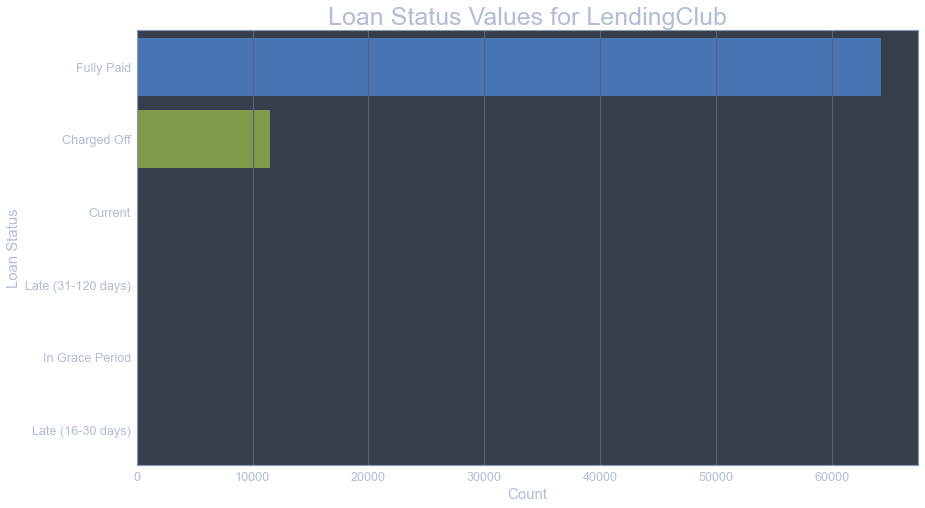

In [61]:
# Plot the value counts
plt.figure(figsize=(14,8))
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

sns.barplot(y=loan_status_vis.index, x=loan_status_vis)
plt.title('Loan Status Values for LendingClub', fontsize=25)
plt.ylabel('Loan Status', fontsize=15)
plt.xlabel('Count', fontsize=15)

###### The two columns that we are looking at for the future model are 'current' and 'default'. It's clear to see there will be class imbalances that need to be dealt with. In this bar plot, most records contain loans that have been fully paid or currently in status.'''

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


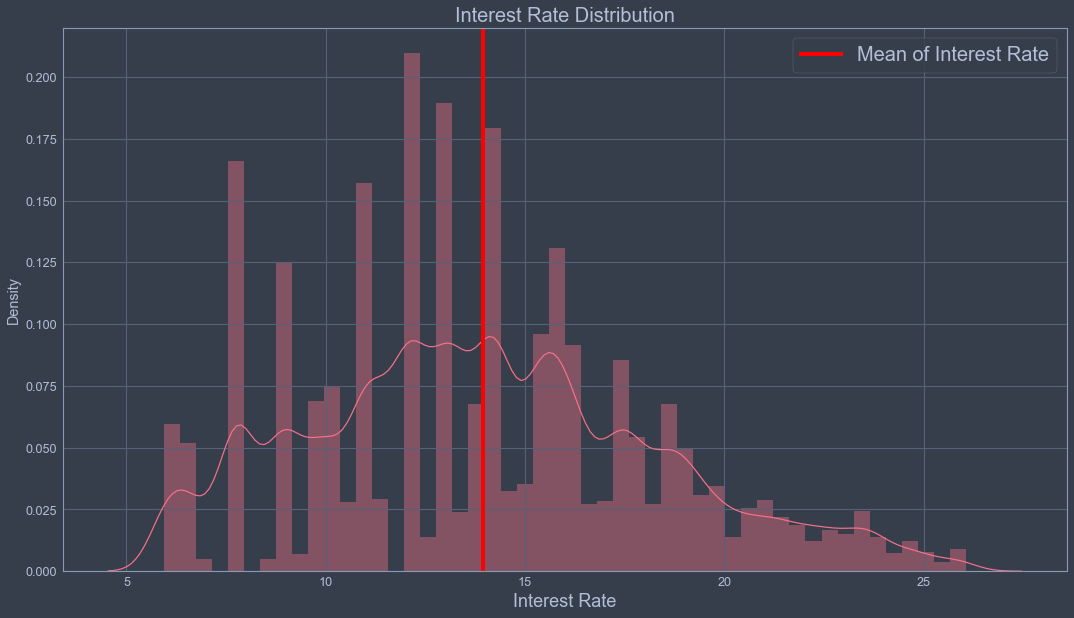

In [62]:
# Visualize the distribution of interest rates
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(lc_eda['int_rate'], hist='density')
plt.axvline(x=lc.int_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

###### This plot identifies the distributions of loan interest rate records within the dataset. The solid red line represents the mean interest rate for all loans. The solid orange line represents the mean interest rate for loans that have been defaulted. There is a clear 3.95% increase in interest rate between defaulted loans vs. non-defaulted.

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


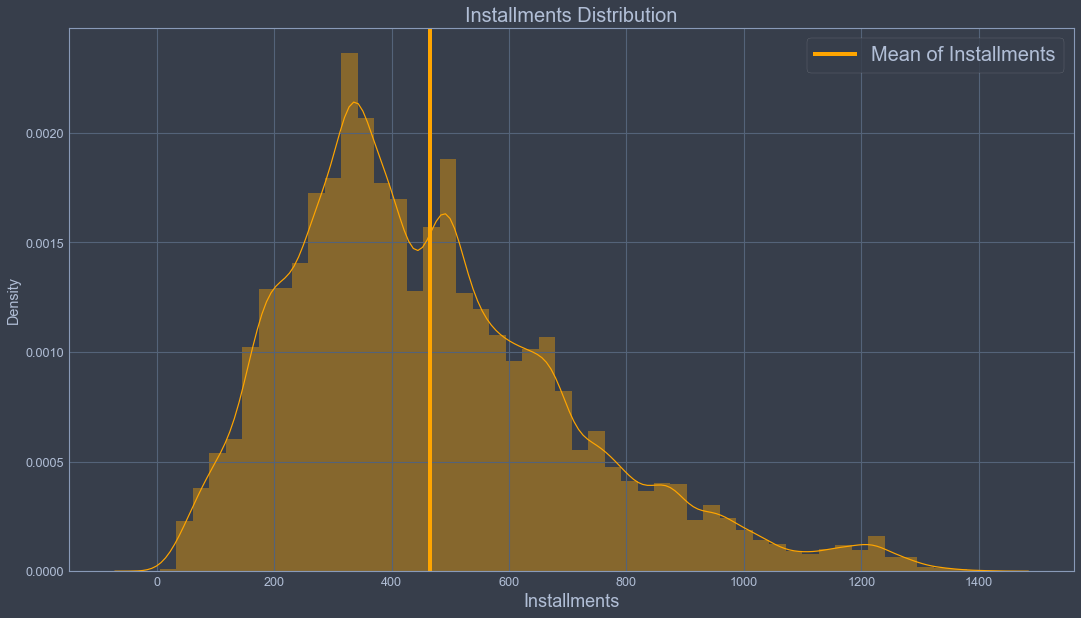

In [63]:
# Visualize the distribution of installments
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(lc_eda['installment'], hist='density', color='orange')
plt.axvline(x=lc.installment.mean(), color='orange', linestyle='-', lw=4, label='Mean of Installments')
plt.title('Installments Distribution', fontsize=20)
plt.xlabel('Installments', fontsize=18)
plt.legend(fontsize=20)
plt.show()

### Loan Grades

In [64]:
# Set a new variable for the purpose of displaying the value counts of 'grade'
grade_vis = lc_eda['grade'].value_counts()

Text(0.5, 0, 'Count')

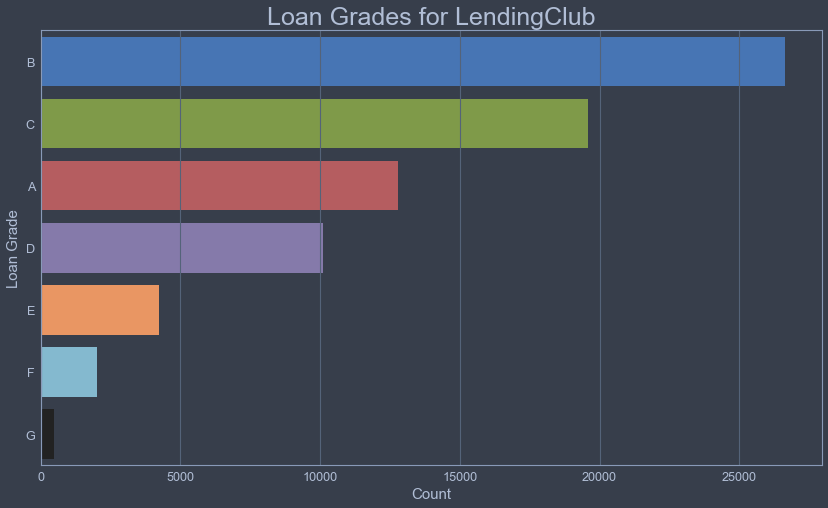

In [65]:
# Plot the value counts
plt.figure(figsize=(14,8))
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

sns.barplot(y=grade_vis.index, x=grade_vis)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

###### Here is a simple count plot for loan grades within the dataset. The most popular grades are B and C. A-graded loans come third. There are few F and G graded loans, probably for the best. However it is important to notice that B and C graded loans occur more often than top rated 'A' loans.

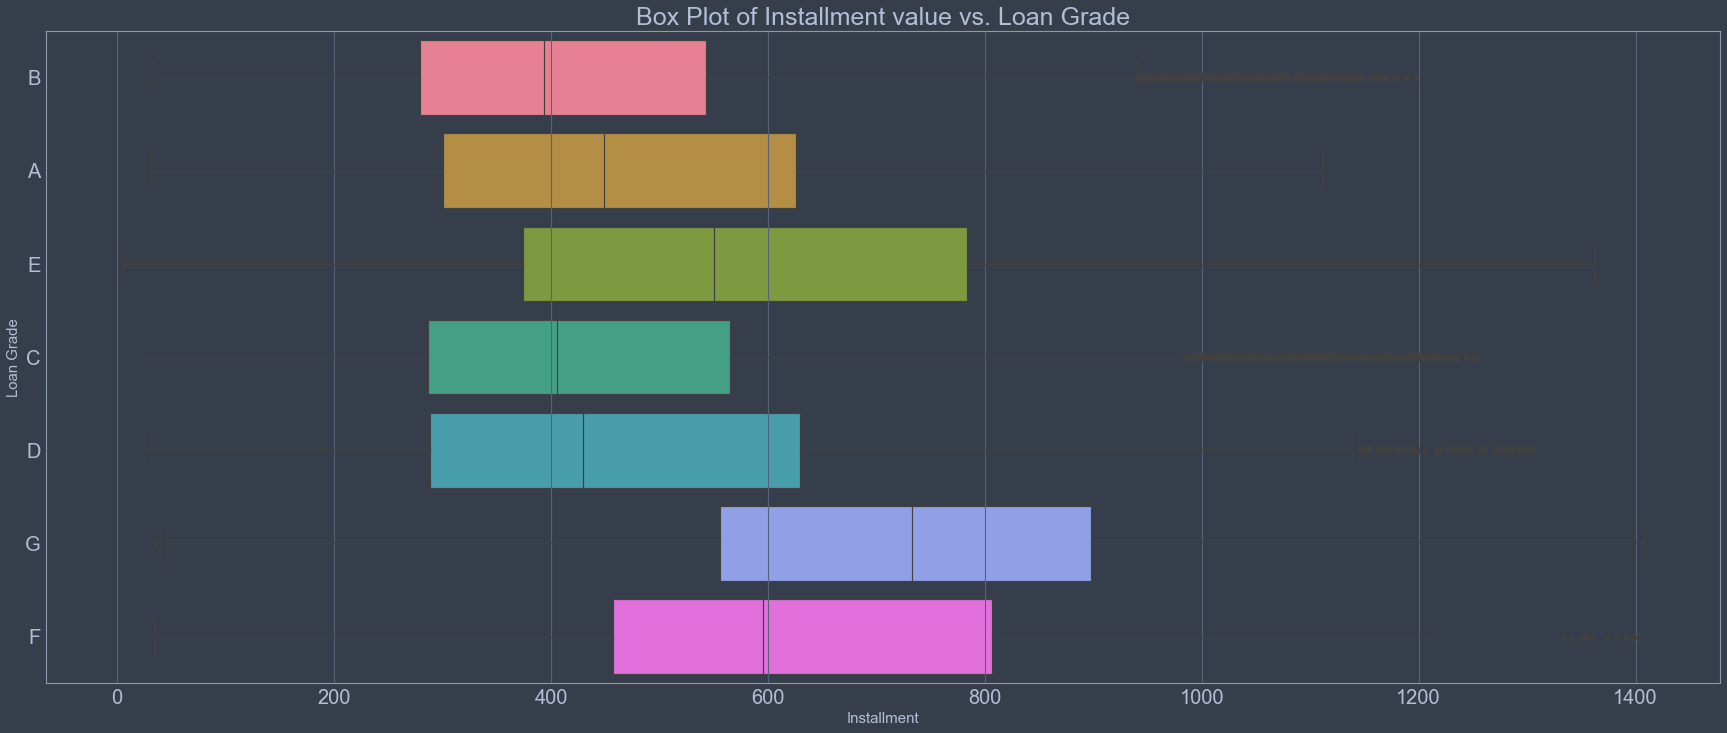

In [66]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="installment", y="grade", data=lc_eda, palette="husl")
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

###### The lowest rated loans have the highest average installments. Average installments seem to increase from D-grade moving down to G-grade. The average installment for G-graded loans is around 625 dollars and for A-graded loans, 350 dollars.

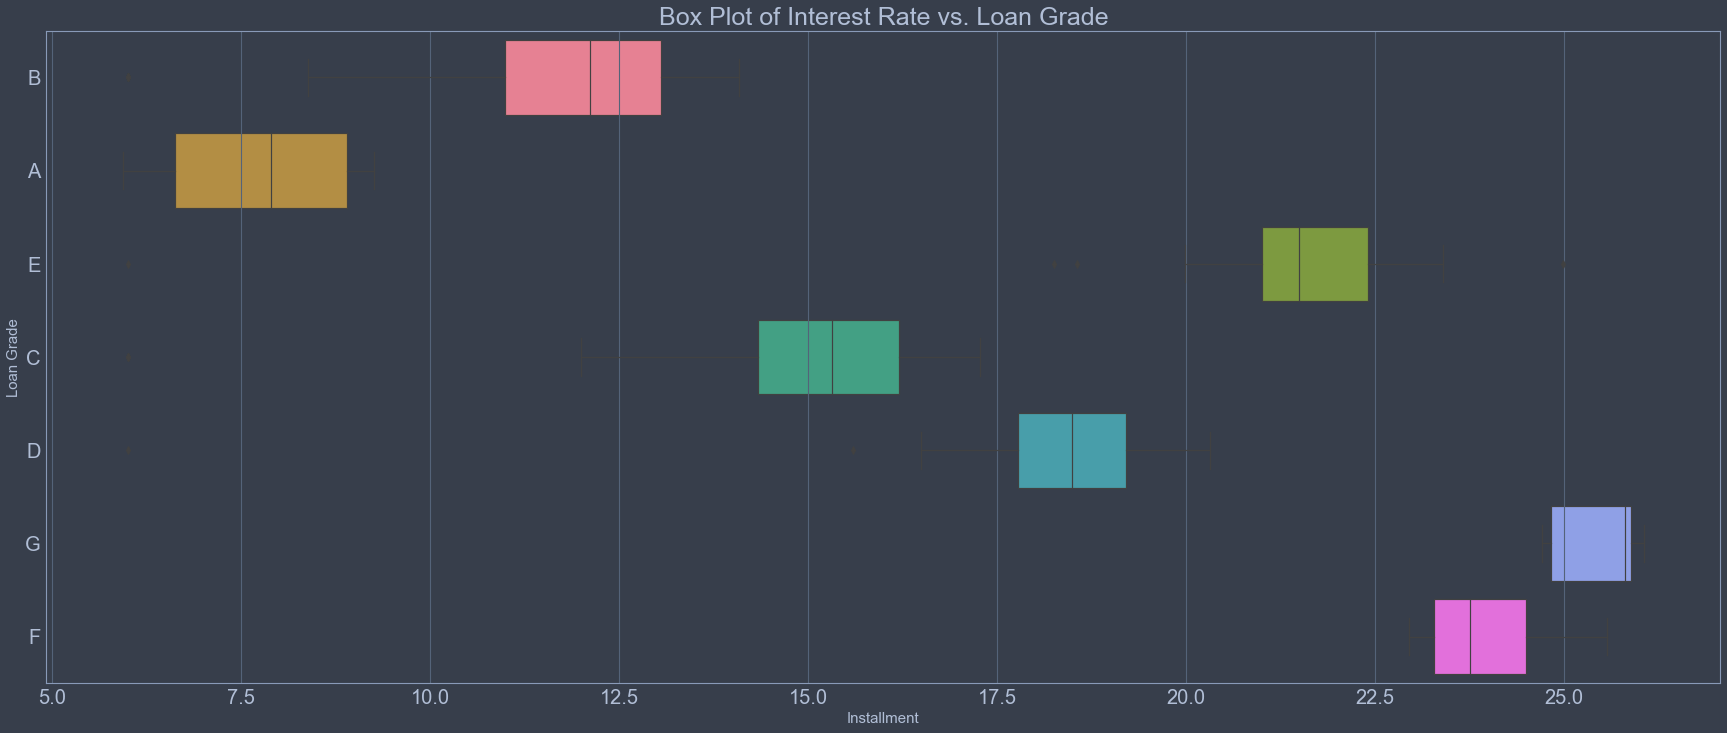

In [67]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="int_rate", y="grade", data=lc_eda, palette="husl")
plt.title('Box Plot of Interest Rate vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Other Loan Features

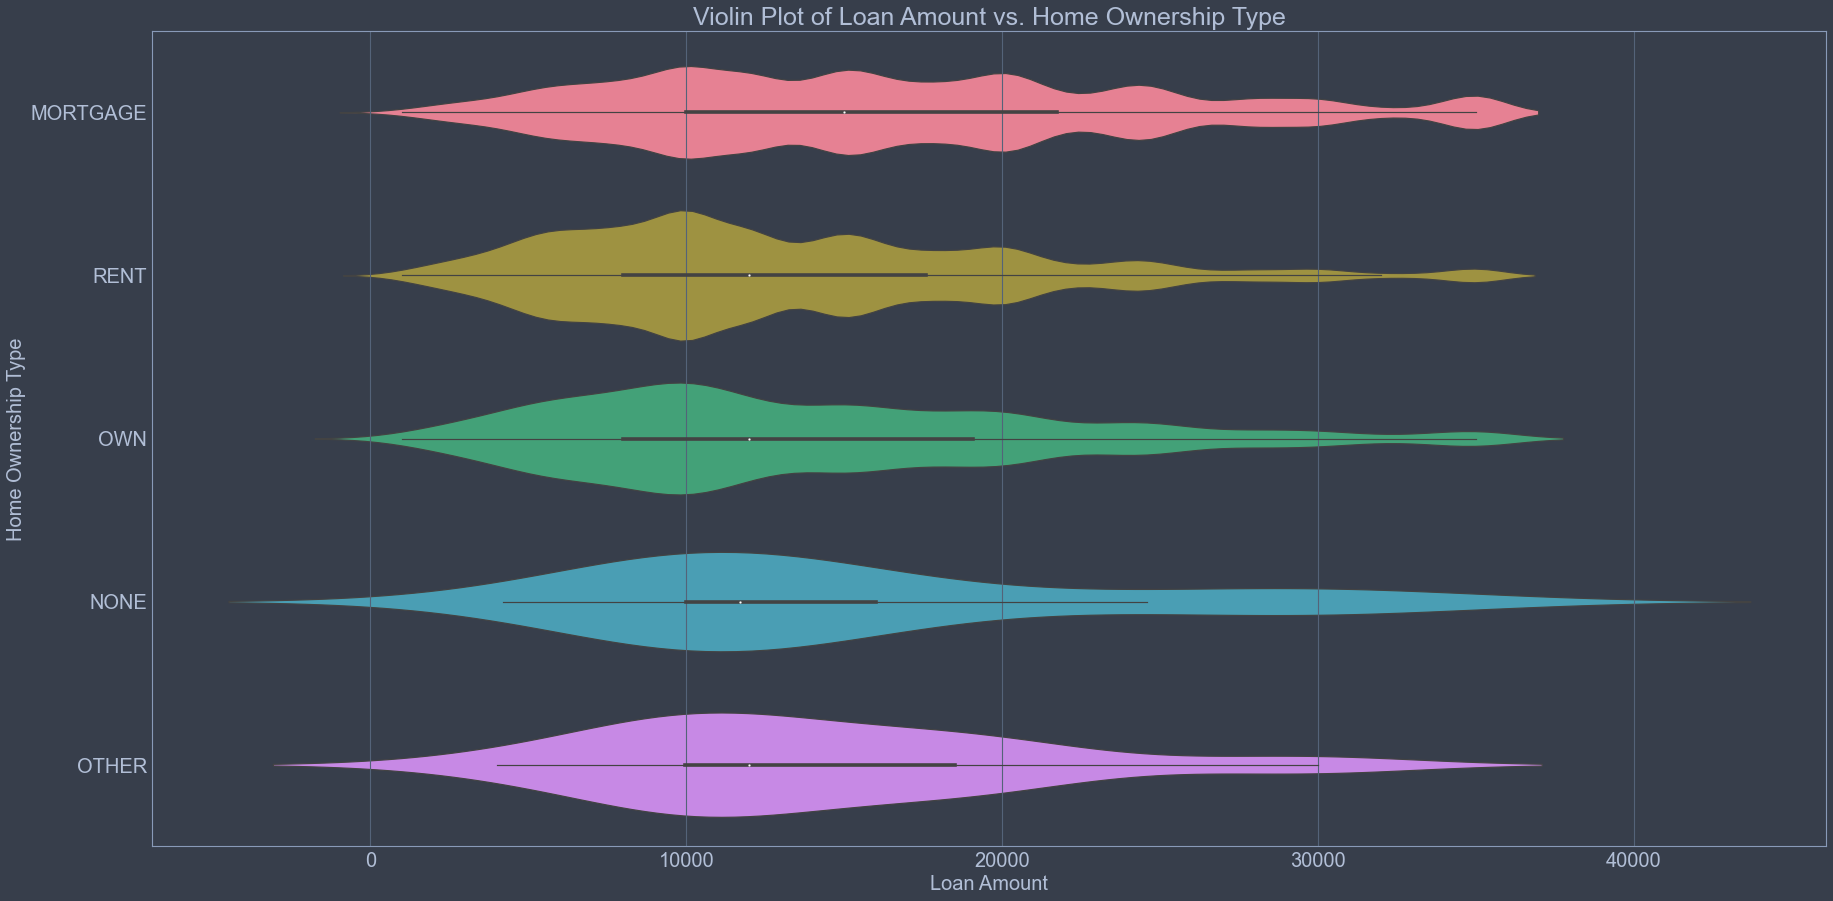

In [68]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,15))
sns.violinplot(x="loan_amnt", y="home_ownership", data=lc_eda, palette="husl")
plt.title('Violin Plot of Loan Amount vs. Home Ownership Type', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Home Ownership Type', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

###### This plot identified the mean and density distribution for loan amounts per home-ownership type. Borrowers can be categorized into seven ownership types. Borrowers with mortgages have the highest average loan amount and those who rent have the lowest loan amount for analytical categories.

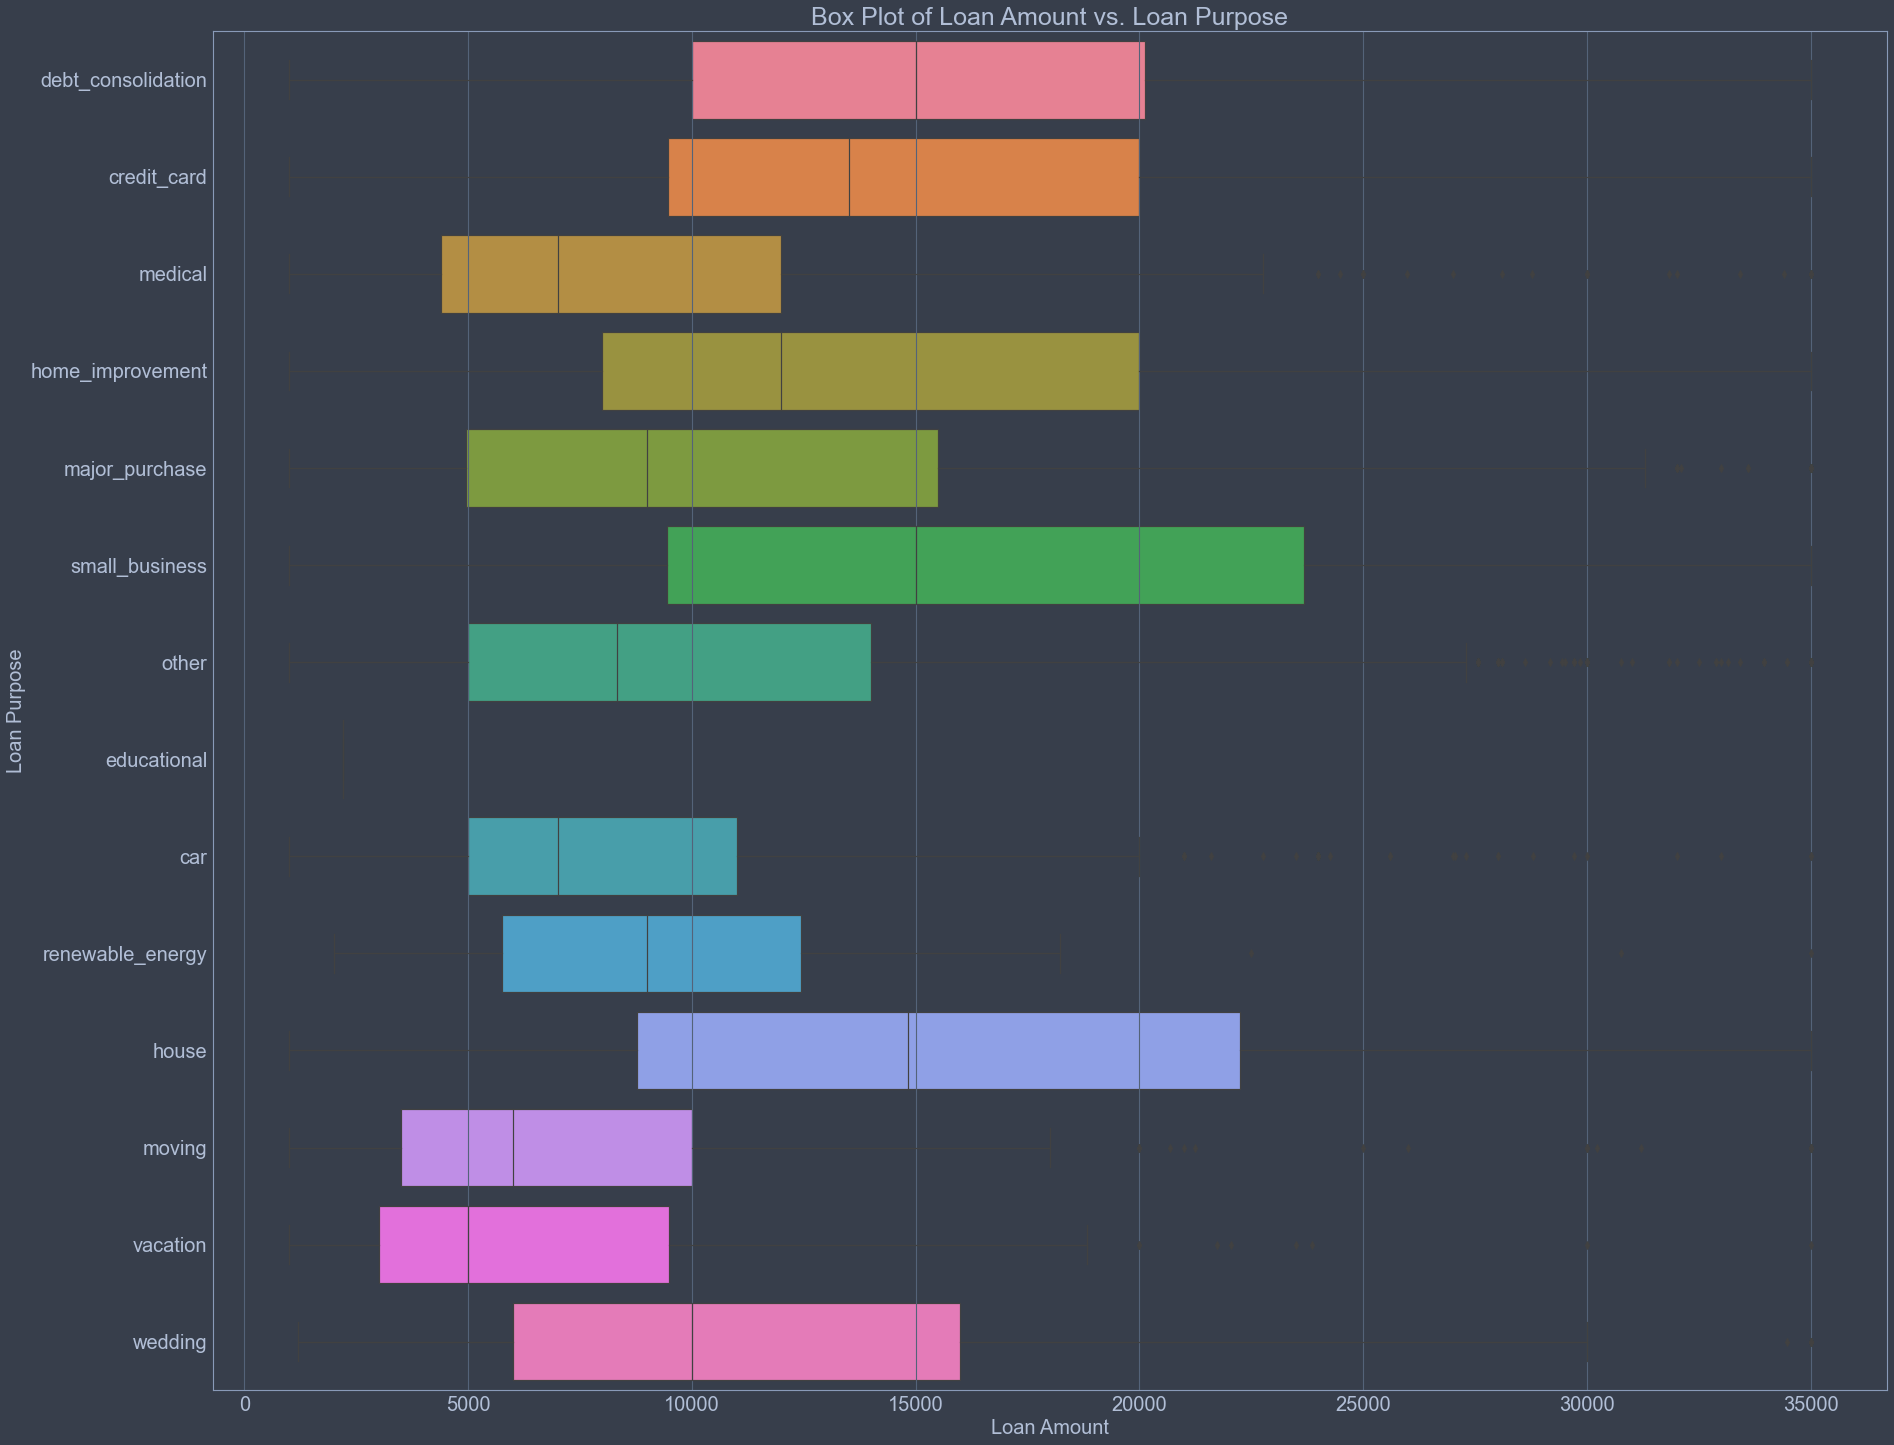

In [69]:
# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(30,25))
sns.boxplot(x="loan_amnt", y="purpose", data=lc_eda, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [70]:
# Drop values from df that are more than 100
dti_vis = lc_eda[lc_eda.dti < 100]

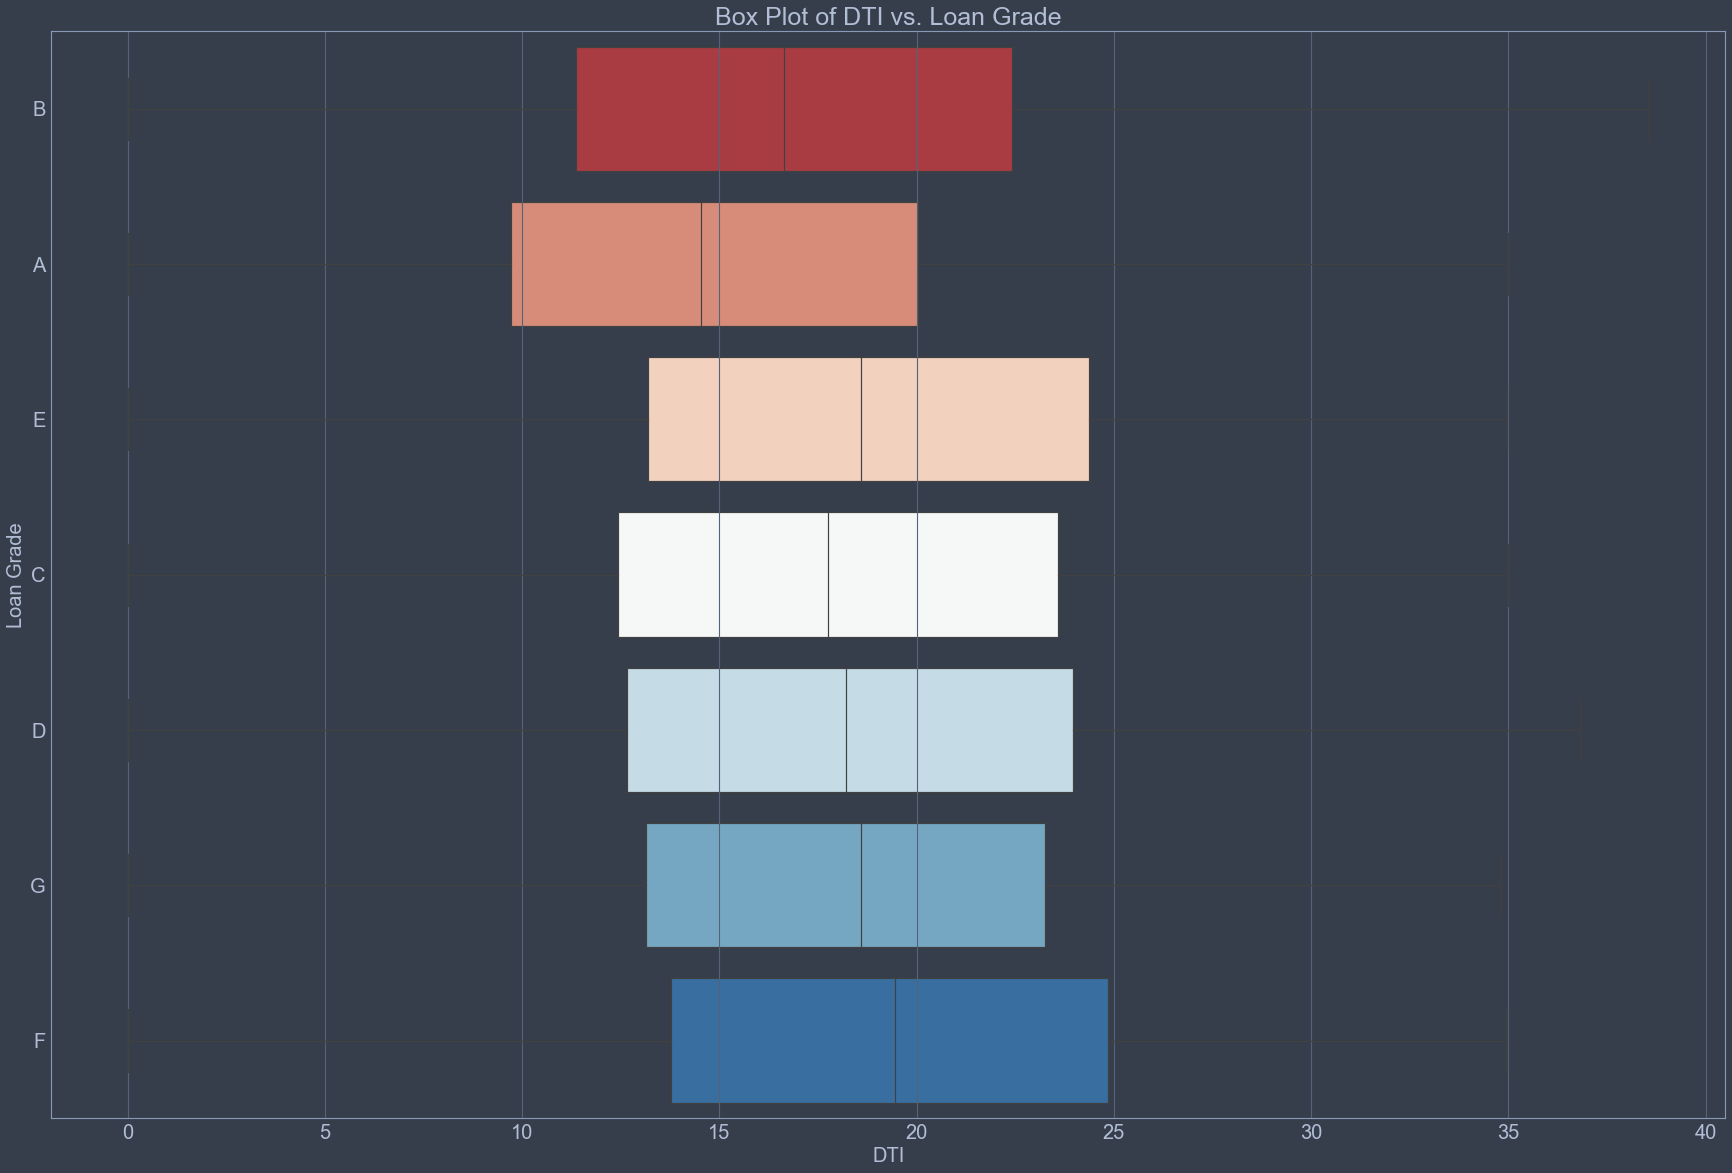

In [71]:
# Plot the borrower's DTI compared to load grade
plt.figure(figsize=(30,20))
sns.boxplot(x="dti", y="grade", data=dti_vis, palette="RdBu")
plt.title('Box Plot of DTI vs. Loan Grade', fontsize=25)
plt.xlabel('DTI', fontsize=20)
plt.ylabel('Loan Grade', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

###### The DTI feature can be calculated by taking monthly payments on the total debt obligations, excluding mortgage, divided by self-reported monthly income. Looking at this box plot, having a lower DTI results in a better loan grade. on the contrary, borrowers who own grade 'G' loans have the highest average DTI.

## Number of Loans in Dataset by State

###### Below, we see that a large number of loans are issued to borrowers in California, Texas, New York, and Florida relative to the number of loans issued in other states. We may compare loan performance by state, but we should ensure that our investment strategies do not discriminate based on a borrower's state.

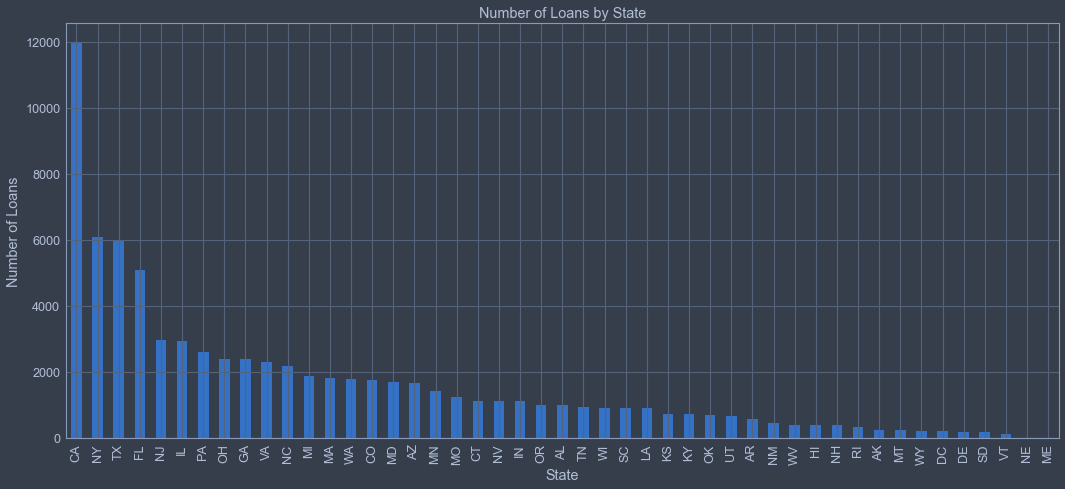

In [72]:
loan_origin=pd.DataFrame(lc.groupby('addr_state')['addr_state'].agg('count').sort_values(ascending=False))
loan_origin.plot(kind='bar', figsize=(15,7), legend=False)
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.title('Number of Loans by State')
plt.tight_layout()